Import library

In [ ]:
!pip install matplotlib --upgrade --quiet

     |████████████████████████████████| 11.2 MB 4.6 MB/s 
     |████████████████████████████████| 965 kB 46.7 MB/s 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import metrics

Utils

In [ ]:
exercise_type = ['BulgSq',
 'CMJDL',
 'CMJSL',
 'DeclineSq',
 'DropJumpDL',
 'DropJumpSL',
 'DropLandDL',
 'DropLandSL',
 'FwHop',
 'FwHopFast',
 'FwJump',
 'FwJumpFast',
 'HeelRaise',
 'LatHop',
 'LatHopFast',
 'LatJump',
 'LatJumpFast',
 'Lunge',
 'MaxHop',
 'MaxJump',
 'Pose',
 'Run',
 'RunCut',
 'RunDec',
 'SpainSq',
 'SplitJump',
 'SportJump',
 'SqDL',
 'SqHalfDL',
 'SqHalfSL',
 'SqSL',
 'StepDnH',
 'StepDnL',
 'StepUpH',
 'StepUpL',
 'SumoSq',
 'Walk']

In [ ]:
cluster = list(range(0,10))

In [ ]:
# Normalize confusion matrix
def normalize_cm(cm):
  norm_cm = np.zeros(cm.shape) # init

  num_sbj = cm.shape[0]
  num_ex = cm.shape[1]

  # Loop through subject with different confusion matrices
  for s in range(num_sbj):

    # Loop through exercises
    for e in range(num_ex):

      # Check if there is missing exercise
      num_trial = sum(cm[s][e, :])

      if num_trial != 0:
        norm_cm[s][e, :] = cm[s][e, :]/num_trial
      else:
        pass # do nothing since the row is already zero

  return norm_cm

# Average the normalize confusion matrix
def get_avg_cm(norm_cm):
  num_sbj = norm_cm.shape[0]
  num_ex = norm_cm.shape[1]

  avg_norm_cm = np.zeros([num_ex, num_ex]) # init
  num_trials = np.zeros(num_ex) # store the no. of trials for each exercise

  # Loop through subjects
  for s in range(num_sbj):
     
     # Loop through exercises
     for e in range(num_ex):

      # Check if there is missing trial
      if sum(norm_cm[s][e, :]) != 0:
        avg_norm_cm[e, :] = avg_norm_cm[e, :] + norm_cm[s][e, :]
        num_trials[e] = num_trials[e] + 1
      else:
        pass

  # Compute the average
  for e in range(num_ex):
    avg_norm_cm[e, :] = avg_norm_cm[e, :]/num_trials[e]

  return avg_norm_cm

###**Get the 1st matrix**

Read data

In [ ]:
# Retrieve confusion matrices
with open('test_cm_1.npy', 'rb') as f:
# with open('acc_test_cm.npy', 'rb') as f:
  r_test_cm_1 = np.load(f)

Compute the averaged confusion matrix

In [ ]:
norm_test_cm_1 = normalize_cm(r_test_cm_1)
avg_norm_cm_1 = get_avg_cm(norm_test_cm_1)
# print(avg_norm_cm_1)

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(avg_norm_cm_1, cmap = 'YlGnBu')
plt.xlabel('Prediction')
plt.ylabel('Truth')

###**Get the 2nd matrix**

Read data

In [ ]:
# Retrieve confusion matrices
with open('test_cm_2.npy', 'rb') as f:
# with open('gyro_test_cm.npy', 'rb') as f:
  r_test_cm_2 = np.load(f)

Compute the averaged confusion matrix

In [ ]:
norm_test_cm_2 = normalize_cm(r_test_cm_2)
avg_norm_cm_2 = get_avg_cm(norm_test_cm_2)
# print(avg_norm_cm_2)

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(avg_norm_cm_2, cmap = 'YlGnBu')
plt.xlabel('Prediction')
plt.ylabel('Truth')

###**Get the 3rd matrix**

Read data

In [ ]:
# Retrieve confusion matrices
with open('test_cm_3.npy', 'rb') as f:
# with open('both_test_cm.npy', 'rb') as f:
  r_test_cm_3 = np.load(f)

In [ ]:
norm_test_cm_3 = normalize_cm(r_test_cm_3)
avg_norm_cm_3 = get_avg_cm(norm_test_cm_3)
# print(avg_norm_cm_3)

##**Get the 4th matrix**

In [ ]:
# Retrieve confusion matrices
with open('test_cm_4.npy', 'rb') as f:
  r_test_cm_4 = np.load(f)

In [ ]:
norm_test_cm_4 = normalize_cm(r_test_cm_4)
avg_norm_cm_4 = get_avg_cm(norm_test_cm_4)
# print(avg_norm_cm_3)

##**Calculate the difference**

In [ ]:
# com = np.concatenate([np.diag(avg_norm_cm_4).reshape([1, 37]),
#                       np.diag(avg_norm_cm_3).reshape([1, 37]),
#                       np.diag(avg_norm_cm_2).reshape([1, 37]), 
#                       np.diag(avg_norm_cm_1).reshape([1, 37])]) # for all 37 exercises

com = np.concatenate([np.diag(avg_norm_cm_4).reshape([1, 10]),
                      np.diag(avg_norm_cm_3).reshape([1, 10]),
                      np.diag(avg_norm_cm_2).reshape([1, 10]), 
                      np.diag(avg_norm_cm_1).reshape([1, 10])]) # for all 10 group-exercises
                      
com.shape

(4, 10)

In [ ]:
# Get annotation of best performance
annot_labels = np.empty_like(com, dtype=str)
annot_mask = np.where(com == np.max(com, axis=0))
annot_labels[annot_mask] = 'X'
annot_mask_zero = np.where(com == 0)
annot_labels[annot_mask_zero] = ''

In [ ]:
com

array([[0.88848782, 0.85475165, 0.90925904, 0.77192982, 0.97343188,
        0.89298246, 0.64255408, 0.90837737, 0.98496241, 0.91572682],
       [0.90601879, 0.93476933, 0.85228614, 0.29824561, 0.9887218 ,
        0.99122807, 0.82715457, 0.93327976, 0.81516291, 0.72932331],
       [0.90529424, 0.90069196, 0.88120816, 0.54385965, 0.99185464,
        0.78947368, 0.77155345, 0.92042607, 0.81641604, 0.7556391 ],
       [0.91308495, 0.87130916, 0.93001146, 0.78947368, 0.9962406 ,
        0.77192982, 0.7194443 , 0.83724529, 0.81046366, 0.84837093]])

In [ ]:
annot_labels

array([['', '', '', '', '', '', '', '', 'X', 'X'],
       ['', 'X', '', '', '', 'X', 'X', 'X', '', ''],
       ['', '', '', '', '', '', '', '', '', ''],
       ['X', '', 'X', 'X', 'X', '', '', '', '', '']], dtype='<U1')

Text(0.5, 6.0, 'F1-score')

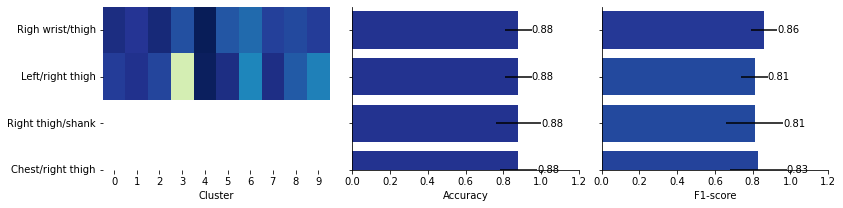

In [ ]:
# fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 3), sharey='row',
#                                gridspec_kw={'width_ratios': [5, 1.5, 1.5], 'wspace': 0.07})
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(13, 3), sharey='row',
                               gridspec_kw={'width_ratios': [5, 5, 5], 'wspace': 0.1})
# Heatmap
sns.heatmap(com, cmap = 'YlGnBu', 
            annot = False, 
            # annot = annot_labels, fmt = '',
            cbar = False,
            vmin = 0, vmax = 1.0, 
            # xticklabels = exercise_type, 
            yticklabels = ['Righ wrist/thigh', 'Left/right thigh', 'Right thigh/shank', 'Chest/right thigh'],
            ax = ax1)
ax1.set_xlabel('Cluster')

# Bar chart
# Accuracy
avg_acc_1 = 0.88
avg_acc_2 = 0.88
avg_acc_3 = 0.88
avg_acc_4 = 0.88
std_acc_1 = 0.10
std_acc_2 = 0.12
std_acc_3 = 0.07
std_acc_4 = 0.07
my_cmap = plt.get_cmap('YlGnBu')
acc_bar1 = ax2.barh([3.5], [avg_acc_1], xerr = std_acc_1, color = my_cmap(avg_acc_1))
acc_bar2 = ax2.barh([2.5], [avg_acc_2], xerr = std_acc_2, color = my_cmap(avg_acc_2))
acc_bar3 = ax2.barh([1.5], [avg_acc_3], xerr = std_acc_3, color = my_cmap(avg_acc_3))
acc_bar4 = ax2.barh([0.5], [avg_acc_4], xerr = std_acc_4, color = my_cmap(avg_acc_4))
ax2.bar_label(acc_bar1, fmt='%.2f')
ax2.bar_label(acc_bar2, fmt='%.2f')
ax2.bar_label(acc_bar3, fmt='%.2f')
ax2.bar_label(acc_bar4, fmt='%.2f')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_xlim([0, 1.2])
ax2.set_xlabel('Accuracy')

# F1-score
avg_f1_1 = 0.83
avg_f1_2 = 0.81
avg_f1_3 = 0.81
avg_f1_4 = 0.86
std_f1_1 = 0.15
std_f1_2 = 0.15
std_f1_3 = 0.07
std_f1_4 = 0.07
f1_bar1 = ax3.barh([3.5], [avg_f1_1], xerr = std_f1_1, color = my_cmap(avg_f1_1))
f1_bar2 = ax3.barh([2.5], [avg_f1_2], xerr = std_f1_2, color = my_cmap(avg_f1_2))
f1_bar3 = ax3.barh([1.5], [avg_f1_3], xerr = std_f1_3, color = my_cmap(avg_f1_3))
f1_bar4 = ax3.barh([0.5], [avg_f1_4], xerr = std_f1_4, color = my_cmap(avg_f1_4))
ax3.bar_label(f1_bar1, fmt='%.2f')
ax3.bar_label(f1_bar2, fmt='%.2f')
ax3.bar_label(f1_bar3, fmt='%.2f')
ax3.bar_label(f1_bar4, fmt='%.2f')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.set_xlim([0, 1.2])
ax3.set_xlabel('F1-score')

###**Add one more IMU**

In [ ]:
avg_norm_cm_diff = avg_norm_cm_2 - avg_norm_cm_1
# print(avg_norm_cm_diff)

In [ ]:
# com = np.concatenate([np.diag(avg_norm_cm_2).reshape([1, 37]), np.diag(avg_norm_cm_1).reshape([1, 37])]) # for all 37 exercises
com = np.concatenate([np.diag(avg_norm_cm_2).reshape([1, 10]), np.diag(avg_norm_cm_1).reshape([1, 10])]) # for 10 group-exercises
com.shape

(2, 10)

(0.0, 1.2, -1.0, 1.0)

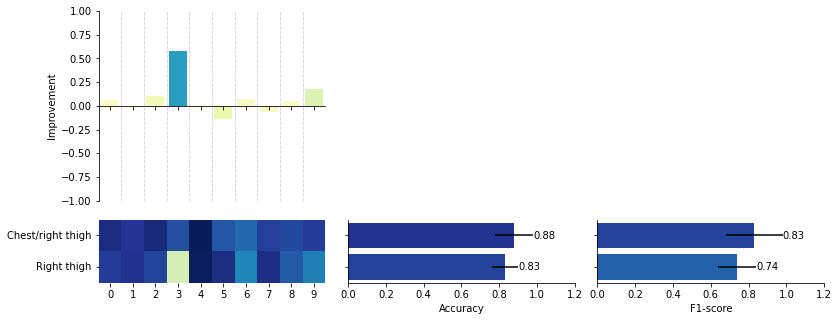

In [ ]:
# fig, ((ax_diff, ax_dum_1, ax_dum_2), (ax1, ax2, ax3)) = plt.subplots(nrows = 2, ncols=3, figsize=(18, 5), sharey='row', sharex='col',
#                                gridspec_kw={'height_ratios': [3, 1], 'width_ratios': [5, 1.5, 1.5], 'wspace': 0.07, 'hspace': 0.15})
fig, ((ax_diff, ax_dum_1, ax_dum_2), (ax1, ax2, ax3)) = plt.subplots(nrows = 2, ncols=3, figsize=(13, 5), sharey='row', sharex='col',
                               gridspec_kw={'height_ratios': [3, 1], 'width_ratios': [5, 5, 5], 'wspace': 0.1, 'hspace': 0.15})
# fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 1), sharey='row',
#                                gridspec_kw={'width_ratios': [5, 5, 5], 'wspace': 0.1})
# Heatmap
sns.heatmap(com, cmap = 'YlGnBu', annot = False, cbar = False,
            vmin = 0, vmax = 1.0, 
            # xticklabels = exercise_type, 
            yticklabels = ['Chest/right thigh', 'Right thigh'],
            ax = ax1)

# Bar chart
# Accuracy
avg_acc_1 = 0.83
avg_acc_2 = 0.88
std_acc_1 = 0.07
std_acc_2 = 0.10
my_cmap = plt.get_cmap('YlGnBu')
acc_bar1 = ax2.barh([1.5], [avg_acc_1], xerr = std_acc_1, color = my_cmap(avg_acc_1))
acc_bar2 = ax2.barh([0.5], [avg_acc_2], xerr = std_acc_2, color = my_cmap(avg_acc_2))
ax2.bar_label(acc_bar1, fmt='%.2f')
ax2.bar_label(acc_bar2, fmt='%.2f')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_xlim([0, 1.2])
ax2.set_xlabel('Accuracy')

# F1-score
avg_f1_1 = 0.74
avg_f1_2 = 0.83
std_f1_1 = 0.10
std_f1_2 = 0.15
f1_bar1 = ax3.barh([1.5], [avg_f1_1], xerr = std_f1_1, color = my_cmap(avg_f1_1))
f1_bar2 = ax3.barh([0.5], [avg_f1_2], xerr = std_f1_2, color = my_cmap(avg_f1_2))
ax3.bar_label(f1_bar1, fmt='%.2f')
ax3.bar_label(f1_bar2, fmt='%.2f')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.set_xlim([0, 1.2])
ax3.set_xlabel('F1-score')

# Plot the difference
# diff_bar = ax_diff.bar(np.array(range(37)) + 0.5, np.diag(avg_norm_cm_diff), color = my_cmap(np.abs(np.diag(avg_norm_cm_diff))))
diff_bar = ax_diff.bar(np.array(range(10)) + 0.5, np.diag(avg_norm_cm_diff), color = my_cmap(np.abs(np.diag(avg_norm_cm_diff))))
# ax_diff.bar_label(diff_bar, fmt='%.2f')
ax_diff.spines['top'].set_visible(False)
ax_diff.spines['right'].set_visible(False)
ax_diff.spines['bottom'].set_position('zero')
ax_diff.set_ylim([-1, 1])
ax_diff.set_ylabel('Improvement')
for i in range(37):
  ax_diff.axvline(i+1, color = [211/255, 211/255, 211/255], linestyle = '--', linewidth = 0.9)

# Off the other dummy axes
ax_dum_1.axis('off')
ax_dum_2.axis('off')

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(avg_norm_cm_diff, vmax=1, vmin=-1, center=0)
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [ ]:
fig, ax = plt.subplots(figsize = (8, 10))
ax.barh(exercise_type, np.diag(avg_norm_cm_diff))
ax.vlines(0, -1, 38, linestyles = 'dashed', colors = 'r')
ax.set_ylim([-1, 37])
ax.set_xlabel('Improvement')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

In [ ]:
fig, ax = plt.subplots(figsize = (8, 10))
ax.barh(cluster, np.diag(avg_norm_cm_diff))
ax.vlines(0, -1, 38, linestyles = 'dashed', colors = 'r')
ax.set_ylim([-1, 10])
ax.set_xlabel('Improvement')
ax.set_ylabel('Cluster')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

**Which information is more important**
(i.e., accelerometer, gyroscope, or both)

In [ ]:
# com = np.concatenate([np.diag(avg_norm_cm_3).reshape([1, 37]), np.diag(avg_norm_cm_1).reshape([1, 37]), np.diag(avg_norm_cm_2).reshape([1, 37])])
com = np.concatenate([np.diag(avg_norm_cm_3).reshape([1, 10]), np.diag(avg_norm_cm_1).reshape([1, 10]), np.diag(avg_norm_cm_2).reshape([1, 10])])
com.shape

(3, 10)

In [ ]:
plt.figure(figsize = (12, 1))
sns.heatmap(com, cmap = 'YlGnBu', annot = False, 
            xticklabels=exercise_type, yticklabels = ['Both', 'Acceleromter', 'Gyroscope'])
# plt.xlabel('Exercises')
# plt.ylabel('Sensor type')

(0.0, 1.2)

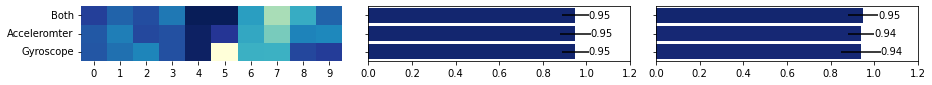

In [ ]:
# fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 1), sharey='row',
#                                gridspec_kw={'width_ratios': [5, 1.5, 1.5], 'wspace': 0.07})
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 1), sharey='row',
                               gridspec_kw={'width_ratios': [5, 5, 5], 'wspace': 0.1})
# Heatmap
sns.heatmap(com, cmap = 'YlGnBu', annot = False, cbar = False,
            # xticklabels = exercise_type, 
            yticklabels = ['Both', 'Acceleromter', 'Gyroscope'],
            ax = ax1)

# Bar chart
# Accuracy
avg_acc_both = 0.95
avg_acc_acc = 0.95
avg_acc_gyro = 0.95
std_acc_both = 0.06
std_acc_acc = 0.07
std_acc_gyro = 0.06
my_cmap = plt.get_cmap('YlGnBu')
acc_bar1 = ax2.barh([0.5], [avg_acc_both], xerr = std_acc_both, color = my_cmap(avg_acc_both))
acc_bar2 = ax2.barh([1.5], [avg_acc_acc], xerr = std_acc_acc, color = my_cmap(avg_acc_acc))
acc_bar3 = ax2.barh([2.5], [avg_acc_gyro], xerr = std_acc_gyro, color = my_cmap(avg_acc_gyro))
ax2.bar_label(acc_bar1, fmt='%.2f')
ax2.bar_label(acc_bar2, fmt='%.2f')
ax2.bar_label(acc_bar3, fmt='%.2f')
ax2.set_xlim([0, 1.2])
# ax2.set_xlabel('Accuracy')

# F1-score
avg_f1_both = 0.95
avg_f1_acc = 0.94
avg_f1_gyro = 0.94
std_f1_both = 0.07
std_f1_acc = 0.06
std_f1_gyro = 0.09
f1_bar1 = ax3.barh([0.5], [avg_f1_both], xerr = std_f1_both, color = my_cmap(avg_f1_both))
f1_bar2 = ax3.barh([1.5], [avg_f1_acc], xerr = std_f1_acc, color = my_cmap(avg_f1_acc))
f1_bar3 = ax3.barh([2.5], [avg_f1_gyro], xerr = std_f1_gyro, color = my_cmap(avg_f1_gyro))
ax3.bar_label(f1_bar1, fmt='%.2f')
ax3.bar_label(f1_bar2, fmt='%.2f')
ax3.bar_label(f1_bar3, fmt='%.2f')
ax3.set_xlim([0, 1.2])
# ax3.set_xlabel('F1-score')

In [ ]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.2.2


In [ ]:
np.mean(com, axis = 1)

array([0.79059258, 0.7752654 , 0.74067431])

In [ ]:
fig, ax = plt.subplots(figsize = (27, 5))
ax.bar(exercise_type, np.diag(avg_norm_cm_diff))
# ax.vlines(0, -1, 38, linestyles = 'dashed', colors = 'r')
ax.set_ylim([-1, 1])
ax.set_xlabel('Improvement')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
# plt.xticks(rotation=90)
ax.xaxis.set_visible(False)